# Demonstration
In this notebook the before trained and tuned parameter gets demonstrated with the beforehand separated testingdata.

Link to the google collab: https://colab.research.google.com/drive/1gRgP7eUHicIGm0nuqYa765ioiyw21Mcn#scrollTo=u4qU4NFAZHb0

## Setup

In [1]:
!wget "https://gist.github.com/Jas53/d613c6a636d6d3c1709b5028d304b8cf/raw/841a26c99679cc0753a17a4f40e9f5eed528cd1e/mlruns.zip" --quiet
!unzip mlruns.zip

Archive:  mlruns.zip
   creating: mlruns/
   creating: mlruns/0/
   creating: mlruns/.trash/
   creating: mlruns/0/c4c25991dd8c4f35b84a8b392d39507f/
   creating: mlruns/0/bddda916e71d43ee978531de7d0dd746/
   creating: mlruns/0/039517e2a186438d87df4e999d201121/
   creating: mlruns/0/0751d2366313450d8c24504d28c0931f/
   creating: mlruns/0/fbd1a229c6db41adba682e8ef6f06a64/
   creating: mlruns/0/3ca2f6b830d6416b97dae8d3f105366a/
   creating: mlruns/0/315141d0e51341b2ba4d66bb618f396c/
   creating: mlruns/0/4871ea1b726b4d919a4b634f07dcd857/
   creating: mlruns/0/cd9fb5110e7d457ba40a5de09a7744c6/
   creating: mlruns/0/0ed362f139154c4ab22ef0daebdfc53a/
   creating: mlruns/0/8268fbe4f05c4936a47539dc352990ae/
   creating: mlruns/0/35bd8450a7554e30951249b30de6d3cb/
   creating: mlruns/0/3e56213b3d1540668a27c37d1c766256/
   creating: mlruns/0/178a87273788496ca7c44704465fa464/
   creating: mlruns/0/01a909abbeee44b6ae8a7bfae466baf4/
   creating: mlruns/0/bfe92468a5ce4a32886c46d5eea77294/
   creating

In [2]:
!pip install -r "/content/mlruns/0/35bd8450a7554e30951249b30de6d3cb/artifacts/model/requirements.txt" --quiet

     |████████████████████████████████| 16.5 MB 15.3 MB/s 
     |████████████████████████████████| 181 kB 27.9 MB/s 
     |████████████████████████████████| 58 kB 3.0 MB/s 
     |████████████████████████████████| 146 kB 39.7 MB/s 
     |████████████████████████████████| 596 kB 11.3 MB/s 
     |████████████████████████████████| 210 kB 46.6 MB/s 
     |████████████████████████████████| 79 kB 6.7 MB/s 
     |████████████████████████████████| 54 kB 1.6 MB/s 
     |████████████████████████████████| 63 kB 773 kB/s 
     |████████████████████████████████| 78 kB 5.5 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.
gym 0.17.3 requires cloudpickle<1.7.0,>=1.2.0, but you have cloudpickle 2.0.0 which is incompatible.
arviz 0.11.4 requires typing-extensions<4,>=3.7.4.3, but you

In [3]:
!pip install -r "/content/mlruns/0/35bd8450a7554e30951249b30de6d3cb/artifacts/model/requirements.txt" --quiet

## Imports

In [4]:
# install packages, if they are not installed
import sys
import subprocess
import pkg_resources
import os

required = {'pandas', 'numpy', 'matplotlib', 'mlflow', 'scikit-learn', 'pickle5'}
installed = {pkg.key for pkg in pkg_resources.working_set}
missing = required - installed

if missing:
    python = sys.executable
    subprocess.check_call([python, '-m', 'pip', 'install', *missing], stdout = subprocess.DEVNULL)

# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import mlflow
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

import requests, zipfile
from io import BytesIO
import pickle5 as pickle

## Functions for metrics

In [5]:
def calc_metrics(actual_data: pd.Series, prediction_data: np.ndarray):
    """
    calculate the different metrics (mean squared error, root mean squared error, mean absolute error 
        and mean absolute percentage error) to evaluate the model accuracy.
    
    Params:
        actual_data (Series): the actual imported data
        prediction_data (ndarray): the from the model predicted data
    
    Returns:
        mse (Float): the calculated mean squared error value
        rmse (Float): the calculated root mean squared error value
        mae (Float): the claclulated mean absolute error value
        mape (FLoat): the calculated mean absolute percentage error value
    """
    mse = mean_squared_error(actual_data, prediction_data)
    rmse = mean_squared_error(actual_data, prediction_data, squared = False)
    mae = mean_absolute_error(actual_data, prediction_data)
    mape = np.mean(np.abs((actual_data - prediction_data) / actual_data)) * 100
    
    print('########## METRICS ##########')
    print('MSE:\t%s\nRMSE:\t%s\nMAE:\t%s\nMAPE:\t%s' % (mse, rmse, mae, mape))
    
    return mse, rmse, mae, mape

## Data

In [6]:
# get data from public git repository
data_url = "https://raw.githubusercontent.com/Jas53/Data_Exploration_Project/main/data/WorldHappinessReport/2019.csv?token=GHSAT0AAAAAABRTCQJTHFZG3IJRNGDWZIIGYR3DMVA"
test_data_url = "https://raw.githubusercontent.com/Jas53/Data_Exploration_Project/main/data/test_data.csv?token=GHSAT0AAAAAABRTCQJTZYJVRMSMPINBVWBEYR3DNHA"
df = pd.read_csv(data_url)
test_data = pd.read_csv(test_data_url)
# set new index for DataFrames
df.set_index('Country or region', inplace = True)
test_data.set_index('Country or region', inplace = True)
#df.head()
#test_data.head()

In [7]:
# define target feature and create feature list
target_feature = 'Score'
features_to_remove = [target_feature, 'Overall rank']
features = df.columns.to_list()
features = [feature for feature in features if feature not in features_to_remove]

In [8]:
# split testing data in features and target_feature
X_test = test_data[features]
y_test = test_data[target_feature]

## Import and demonstrate model

In [9]:
# import model with paramter alpha = 0.0 and l1_ratio = 0.0 from training notebook
#best_model = 'runs:/35bd8450a7554e30951249b30de6d3cb/model'
best_model = "/content/mlruns/0/35bd8450a7554e30951249b30de6d3cb/artifacts/model"
# Load model as a PyFuncModel
model = mlflow.pyfunc.load_model(best_model)

# Predict on a Pandas DataFrame
pred = model.predict(X_test)

### Evaluate the model and the metrics results

In [10]:
# get errors of the prediction with the testing data
mse, rmse, mae, mape = calc_metrics(y_test, pred)

########## METRICS ##########
MSE:	0.22473987743737023
RMSE:	0.47406737647445246
MAE:	0.3598609854536753
MAPE:	7.238541375471931


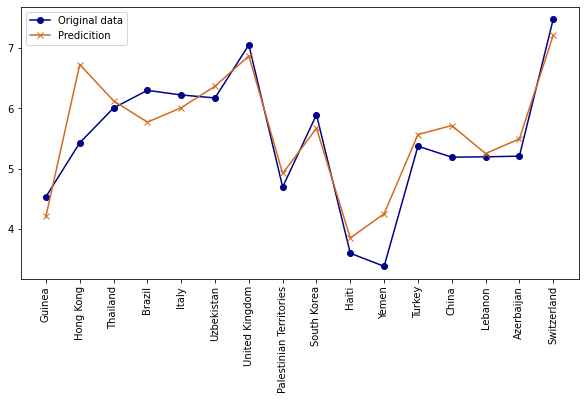

In [11]:
# plot the original datapoints and the predicted datapoints
fig, axs = plt.subplots(1, 1, figsize = (10, 5))
axs.plot(y_test, marker = 'o', color = 'darkblue')
axs.plot(pred, marker = 'x', color = 'chocolate')
axs.tick_params(axis = 'x', rotation = 90)
axs.legend(['Original data', 'Predicition'])

We can see that the datapoints are pretty accurate which reflects the result from the calculated metrics.</br>
Except for HongKong the the predicted happiness score isn't to far off compared to the actual datapoint, which is good.